# Introduction

In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like the following:

* population — the global population.
* population_growth — the annual population growth rate, as a percentage.
* area — the total land and water area.

In this project, we'll use SQL in Jupyter Notebook to analyze data from this database.

# Objective

The objective of this project is to verify the accuracy and reliability of the data provided in the CIA world factbook database by identifying any outliers and confirming the data through other sources.

# Exploring the database

In [16]:
import sqlite3
conn = sqlite3.connect(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\factbook.db')
curr = conn.cursor()
curr.execute("SELECT name FROM sqlite_master WHERE type='table';")
table = curr.fetchall()
print(table)
conn.close()

[('sqlite_sequence',), ('facts',)]


We have two tables in our database namely 'sqlite_sequence' and 'facts'. THE sqlite_sequence table just contains the total number of entries in the facts table. Our main concern in this project would be with the 'facts' table.

# Defining a function to execute a query as a pandas dataframe

In [8]:
import pandas as pd

In [9]:
def execute_query_pandas(query):
    conn = sqlite3.connect(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\factbook.db')
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

In [10]:
execute_query_pandas("SELECT * FROM facts LIMIT 10")

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442,442,0,92436,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400,2736690,43710,43431886,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743,28203,1540,3056382,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220,7682300,58920,22751014,1.07,12.15,7.14,5.65
9,10,au,Austria,83871,82445,1426,8665550,0.55,9.41,9.42,5.56


# Calculating summary statistics

In [18]:
execute_query_pandas("SELECT MIN(area), MIN(population), MIN(population_growth), MAX(population), MAX(population_growth) FROM facts")

,MIN(area),MIN(population),MIN(population_growth),MAX(population),MAX(population_growth)
0,0,0,0.0,7256490011,4.02


The minimum area, population and population growth are all 0 which seems a bit sceptical. The maximum population number also seems very high at 7.25 billion. Let's further explore these numbers.

# Exploring the dataset

In [19]:
execute_query_pandas("SELECT name, area, population, population_growth FROM facts WHERE area = 0")

,name,area,population,population_growth
0,Holy See (Vatican City),0,842,0.0


A simple research reveals that Holy see is a sovereign entity of the Vatican city which itself has a total area of 0.44 Square kilometers. While the numbers are correct, it is revealed that the data also contains information about places that are not excatly countries.

In [20]:
execute_query_pandas("SELECT name, area, population, population_growth FROM facts WHERE population = 0")

,name,area,population,population_growth
0,Antarctica,None,0,None


It seems like the table contains a row for Antarctica, which explains the population of 0. This is what I could find on the internet - 

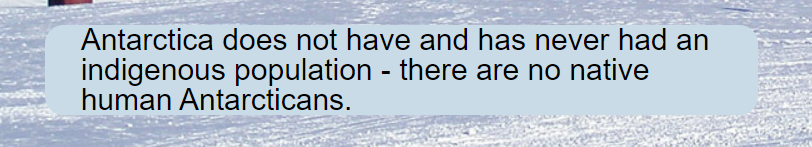

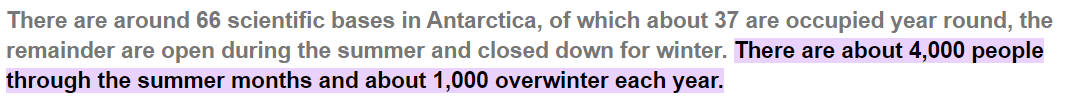

So far, the data checks out.

Let's check the population column

In [21]:
execute_query_pandas("SELECT name, code, population FROM facts WHERE population > 5000000000")

,name,code,population
0,World,xx,7256490011


The table contains data of world population too which the explains the population numbers.

Let's explore the migration_rate column. As a quick note, the migration rate is the number of people who settled in a country per one thousand of population.

In [22]:
execute_query_pandas("SELECT name, migration_rate FROM facts ORDER BY migration_rate DESC LIMIT 10")

,name,migration_rate
0,Qatar,22.39
1,American Samoa,21.13
2,"Micronesia, Federated States of",20.93
3,Syria,19.79
4,Tonga,17.84
5,British Virgin Islands,17.28
6,Luxembourg,17.16
7,Cayman Islands,14.40
8,Singapore,14.05
9,Nauru,13.63


The numbers seem reasonable and expected.

Let's explore the birth rate and death rate columns.

In [23]:
execute_query_pandas("SELECT name, birth_rate FROM facts ORDER BY birth_rate DESC LIMIT 10")

,name,birth_rate
0,Niger,45.45
1,Mali,44.99
2,Uganda,43.79
3,Zambia,42.13
4,Burkina Faso,42.03
5,Burundi,42.01
6,Malawi,41.56
7,Somalia,40.45
8,Angola,38.78
9,Mozambique,38.58


In [25]:
execute_query_pandas("SELECT name, birth_rate FROM facts WHERE birth_rate IS NOT NULL ORDER BY birth_rate LIMIT 10")

,name,birth_rate
0,Monaco,6.65
1,Saint Pierre and Miquelon,7.42
2,Japan,7.93
3,Andorra,8.13
4,"Korea, South",8.19
5,Singapore,8.27
6,Slovenia,8.42
7,Germany,8.47
8,Taiwan,8.47
9,San Marino,8.63


In [27]:
execute_query_pandas("SELECT name, death_rate FROM facts ORDER BY death_rate DESC LIMIT 10")

,name,death_rate
0,Lesotho,14.89
1,Ukraine,14.46
2,Bulgaria,14.44
3,Guinea-Bissau,14.33
4,Latvia,14.31
5,Chad,14.28
6,Lithuania,14.27
7,Namibia,13.91
8,Afghanistan,13.89
9,Central African Republic,13.80


In [28]:
execute_query_pandas("SELECT name, death_rate FROM facts WHERE death_rate IS NOT NULL ORDER BY death_rate LIMIT 10")

,name,death_rate
0,Qatar,1.53
1,United Arab Emirates,1.97
2,Kuwait,2.18
3,Bahrain,2.69
4,Gaza Strip,3.04
5,Turks and Caicos Islands,3.10
6,Saudi Arabia,3.33
7,Oman,3.36
8,Singapore,3.43
9,West Bank,3.50


# Conclusion

The data provided in the 'facts' table of CIA world factbook database seems quiet accurate and reliable with no outliers found. 

It is worth noting that the table includes data not only on countries, but also on other geographic locations that may not meet the strict definition of a country.